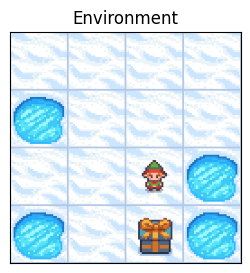

In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append("..")
from mango.environments import frozen_lake

params = dict(map_name="RANDOM", p=None, shape=(4, 4), seed=0)
env = frozen_lake.CustomFrozenLakeEnv(**params)
env = frozen_lake.wrappers.ReInitOnReset(env, **params)
env = frozen_lake.wrappers.TensorObservation(env, one_hot=True)

obs, info = env.reset()
plt.figure(figsize=(3, 3))
plt.title(f"Environment")
plt.imshow(env.unwrapped.render())
plt.xticks([])
plt.yticks([])
plt.show()

In [2]:
from mango.mango import MangoEnv, Agent
from mango.protocols import Policy


class RandomPolicy(Policy):
    def __init__(self, action_space):
        self.action_space = action_space

    def get_action(self, *args, **kwargs):
        return self.action_space.sample()


policy = RandomPolicy(env.action_space)
agent = Agent(MangoEnv(env), RandomPolicy(env.action_space))
agent.run_episode()

TypeError: Agent.run_episode() got an unexpected keyword argument 'render'